In [7]:
import pandas as pd
df=pd.read_csv('python machine learning model xgboost - electricity demand dataset.csv')
df

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
43843,31-Dec-24,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
43844,31-Dec-24,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
43845,31-Dec-24,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957
43846,31-Dec-24,22.0,1.0,12.0,2024.0,366.0,3.000000,51.998107,3353.241682


In [8]:
df.head()

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006


In [9]:
df.tail()

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
43843,31-Dec-24,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
43844,31-Dec-24,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
43845,31-Dec-24,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957
43846,31-Dec-24,22.0,1.0,12.0,2024.0,366.0,3.000000,51.998107,3353.241682
43847,31-Dec-24,23.0,1.0,12.0,2024.0,366.0,6.037472,59.931925,3219.023339


In [10]:
df.columns

Index(['Timestamp', 'hour', 'dayofweek', 'month', 'year', 'dayofyear',
       'Temperature', 'Humidity', 'Demand'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    43848 non-null  object 
 1   hour         43837 non-null  float64
 2   dayofweek    43839 non-null  float64
 3   month        43840 non-null  float64
 4   year         43843 non-null  float64
 5   dayofyear    43843 non-null  float64
 6   Temperature  43841 non-null  float64
 7   Humidity     43838 non-null  float64
 8   Demand       43841 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.0+ MB


In [12]:
df.shape

(43848, 9)

In [13]:
df.isnull().sum()

Timestamp       0
hour           11
dayofweek       9
month           8
year            5
dayofyear       5
Temperature     7
Humidity       10
Demand          7
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Timestamp']=le.fit_transform(df['Timestamp'])

In [15]:
df['hour']=df['hour'].fillna(df['hour'].median())
df['dayofweek']=df['dayofweek'].fillna(df['dayofweek'].median())
df['month']=df['month'].fillna(df['month'].median())
df['year']=df['year'].fillna(df['year'].median())
df['dayofyear']=df['dayofyear'].fillna(df['dayofyear'].median())
df['Temperature']=df['Temperature'].fillna(df['Temperature'].median())
df['Humidity']=df['Humidity'].fillna(df['Humidity'].median())
df['Demand']=df['Demand'].fillna(df['Demand'].median())

In [16]:
df.isnull().sum()

Timestamp      0
hour           0
dayofweek      0
month          0
year           0
dayofyear      0
Temperature    0
Humidity       0
Demand         0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(3)

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df['Demand'].describe()

count    43845.000000
mean      5000.792094
std       1412.462978
min       1611.954020
25%       4015.713338
50%       5013.053367
75%       6000.736948
max      11910.705100
Name: Demand, dtype: float64

<Axes: ylabel='Demand'>

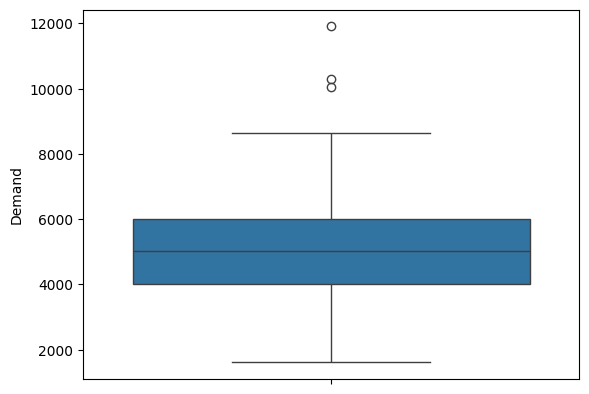

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df['Demand'])

In [22]:
q3=df['Demand'].quantile(0.75)
q1=df['Demand'].quantile(0.25)
iqr=q3-q1
print(iqr)

1985.0236099999997


In [23]:
upper_bounds=q3+1.5*iqr
lower_bounds=q1-1.5*iqr
print(upper_bounds)
print(lower_bounds)

8978.272363
1038.1779230000006


In [45]:
outlayers=df[(df['Demand']<upper_bounds) &  (df['Demand']>lower_bounds)]


<Axes: ylabel='Demand'>

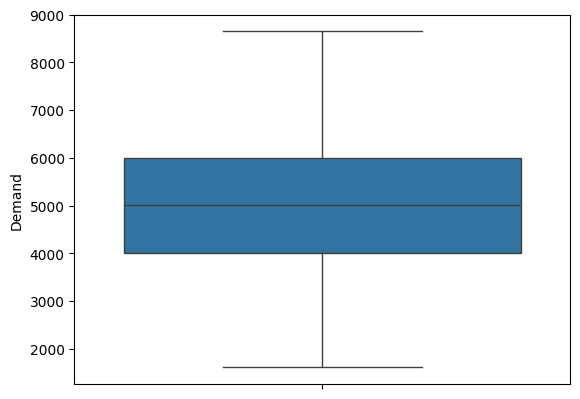

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(outlayers['Demand'])

In [47]:
df['Demand'].describe()

count    43845.000000
mean      5000.792094
std       1412.462978
min       1611.954020
25%       4015.713338
50%       5013.053367
75%       6000.736948
max      11910.705100
Name: Demand, dtype: float64

In [48]:
x=df.drop(["Demand"],axis=1)
y=df["Demand"]
print(x)
print(y)

       Timestamp  hour  dayofweek  month    year  dayofyear  Temperature  \
0             20   0.0        2.0    1.0  2020.0        1.0     3.000000   
1             20   1.0        2.0    1.0  2020.0        1.0     3.000000   
2             20   2.0        2.0    1.0  2020.0        1.0     4.244482   
3             20   3.0        2.0    1.0  2020.0        1.0     3.000000   
4             20   4.0        2.0    1.0  2020.0        1.0     3.881208   
...          ...   ...        ...    ...     ...        ...          ...   
43843       1801  19.0        1.0   12.0  2024.0      366.0     3.956838   
43844       1801  20.0        1.0   12.0  2024.0      366.0     3.118824   
43845       1801  21.0        1.0   12.0  2024.0      366.0     3.000000   
43846       1801  22.0        1.0   12.0  2024.0      366.0     3.000000   
43847       1801  23.0        1.0   12.0  2024.0      366.0     6.037472   

        Humidity  
0      61.288951  
1      52.873702  
2      36.341783  
3      72.6

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
print(x)

[[-1.69310468e+00 -1.66138471e+00 -4.99924449e-01 ... -1.72750195e+00
  -1.72122239e+00  7.55649481e-02]
 [-1.69310468e+00 -1.51690315e+00 -4.99924449e-01 ... -1.72750195e+00
  -1.72122239e+00 -3.83258535e-01]
 [-1.69310468e+00 -1.37242159e+00 -4.99924449e-01 ... -1.72750195e+00
  -1.62415648e+00 -1.28462609e+00]
 ...
 [ 1.68368768e+00  1.37272805e+00 -9.99951538e-01 ...  1.73302658e+00
  -1.72122239e+00 -1.05431424e+00]
 [ 1.68368768e+00  1.51720961e+00 -9.99951538e-01 ...  1.73302658e+00
  -1.72122239e+00 -4.30998486e-01]
 [ 1.68368768e+00  1.66169118e+00 -9.99951538e-01 ...  1.73302658e+00
  -1.48430847e+00  1.57600808e-03]]


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
le=LinearRegression()
le.fit(x_train,y_train)
pred=le.predict(x_test)
print(pred)

[5274.59478821 5395.30286011 4356.81844843 ... 4349.98516507 4534.14603243
 2563.38472495]


In [30]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred)
print(r2)

0.8344540041701949


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
le=LinearRegression()
le.fit(x_test,y_test)
pred=le.predict(x_test)
print(pred)


[5269.13718852 5386.12423222 4341.57022277 ... 4293.72970897 4607.02677851
 2600.01990533]


In [32]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred)
print(r2)

0.8356202048182134


In [33]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print(pred)

[5499.861395 5511.427639 5266.613959 ... 4855.223968 4068.84956
 2502.851331]


In [34]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred)
print(r2)

0.9807362355934961


In [35]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_test,y_test)
pred=dt.predict(x_test)
print(pred)

[5489.938344 5632.962587 5691.980434 ... 4576.328313 4470.54773
 2578.300489]


In [36]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred)
print(r2)

1.0


In [37]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(pred)

[5486.6930922  5510.63150878 5512.54841929 ... 4754.20781554 4382.38778308
 2436.94827728]


In [38]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred)
print(r2)

0.9900890525413996


In [39]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_test,y_test)
pred=rf.predict(x_test)
print(pred)

[5523.20424881 5583.36556742 5629.44931083 ... 4619.10095196 4448.67583141
 2493.8632018 ]


In [40]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred)
print(r2)

0.9980647426650108
